# 2.1 Keras 신경망과의 첫 만남



In [1]:
from keras.datasets import mnist #keras mnist declare 

## Keras 에서 MNIST 데이터 셋 적재하기 

train_image, train_labels가 모델이 학습해야할 훈련세트( training set ) 
test_images, test_labels로 구성된 테스트 세트( test set ) 

In [10]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
len(train_labels)

60000

In [13]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
len(test_labels)

10000

In [16]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## 신경망 구조

- 신경망의 핵심 구성요소는 일종의 데이터 처리 필터라고 생각할 수 있는 `층(layer)`이다.
- 층은 주어진 문제에 더 의미있는 `표현(representation)`을 입력 된 데이터로 부터 추출.




In [20]:
from keras import models
from keras import layers

network = models.Sequential()
#조밀하게 연결된(fully connected(완전연결)) Dense layer 2개
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
#10개의 확률 점수가 들어 있는 배열(모두 더하면 1 )
network.add(layers.Dense(10,activation='softmax'))

## 설명
- loss function(손실 함수) : 훈련 데이터에서 신경망의 성능을 측정하는 방법, 네트워크가 옳은 방향으로 학습 될 수 있도록 도와준다. 
- optimizer(옵티마이저) : 입력된 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘. 
- 훈련과 테스트 과정을 모니터링할 지표 : 정확히 분류된 이미지의 비율.

In [22]:
#step of compile
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [23]:
# training image
# traning image [0,255] value, uint8 type ( 60000,28,28) size array
# transfer to that [0,1] value, float32 tpye ( 60000, 28*28) size

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [24]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [25]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 12ms/step - loss: 0.2555 - accuracy: 0.9253
Epoch 2/5
469/469 [==============================] - 5s 12ms/step - loss: 0.1044 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0682 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0503 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0365 - accuracy: 0.9891


In [26]:
test_loss , test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0654 - accuracy: 0.9806


In [27]:
print('test acc: ', test_acc)

test acc:  0.9805999994277954


### overfitting(과대적합)
- 훈련정확도와 테스트 정확도 사이의 차이가 발생할 시.
- 훈련데이터보다 새로운 데이터에서 성능이 낮아지는 경향. 

## 신경망을 위한 데이터 표현
### tensor 


1. Scalar ( 스칼라 )(0D)

In [28]:
import numpy as np
x = np.array(12)

In [29]:
x

array(12)

In [30]:
x.ndim

0

2. vector (1D)

In [31]:
x=np.array([12,3,6,2,3])
x

array([12,  3,  6,  2,  3])

In [32]:
x.ndim

1

3. matrix(2D)

In [33]:
x = np.array([[5,78,2,34,0],
             [6,5,3,2,1],
             [4,2,3,10,40]])
x

array([[ 5, 78,  2, 34,  0],
       [ 6,  5,  3,  2,  1],
       [ 4,  2,  3, 10, 40]])

In [34]:
x.ndim

2

In [36]:
x = np.array([[[5,78,2,34,0],
             [6,5,3,2,1],
             [4,2,3,10,40]],
            [[5,78,2,34,0],
             [6,5,3,2,1],
             [4,2,3,10,40]],
            [[5,78,2,34,0],
             [6,5,3,2,1],
             [4,2,3,10,40]]])
x

array([[[ 5, 78,  2, 34,  0],
        [ 6,  5,  3,  2,  1],
        [ 4,  2,  3, 10, 40]],

       [[ 5, 78,  2, 34,  0],
        [ 6,  5,  3,  2,  1],
        [ 4,  2,  3, 10, 40]],

       [[ 5, 78,  2, 34,  0],
        [ 6,  5,  3,  2,  1],
        [ 4,  2,  3, 10, 40]]])

In [37]:
x.ndim

3

In [38]:
x.shape

(3, 3, 5)

In [41]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [45]:
print(train_images.ndim, train_images.shape, train_images.dtype)

3 (60000, 28, 28) uint8


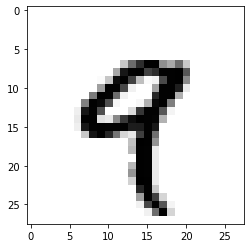

In [46]:
digit = train_images[4]
import matplotlib.pyplot as plt 
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## tensor slicing Example

In [47]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [48]:
my_slice = train_images[10:100,:,:]
print(my_slice.shape)

(90, 28, 28)


In [49]:
my_slice = train_images[10:100,0:28,0:28]
print(my_slice.shape)

(90, 28, 28)


In [51]:
my_slice = train_images[:, 14:, 14:]
print(my_slice.shape)

(60000, 14, 14)


In [52]:
# 정중앙에 있는 14x14 pixel 조각
my_slice = train_images[:, 7:-7, 7:-7]
print(my_slice.shape)

(60000, 14, 14)


### batch data

In [53]:
# batch first
batch = train_images[:128]

In [54]:
# batch second
batch = train_images[128:256]
# batch n th
# batch = train_images[128*n:128*(n+1)]